In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as p
import seaborn as se
se.set_style('whitegrid')
%matplotlib inline

In [2]:
import requests as r
from io import StringIO

In [3]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

source=r.get(url).text

poll_data=StringIO(source)

poll=pd.read_csv(poll_data)

In [4]:
poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [5]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [6]:
poll.describe()

,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration
count,564.000000,586.000000,586.000000,423.000000,202.000000,0.0,586.0
mean,1296.679078,46.805461,44.614334,6.550827,3.376238,NaN,1.0
std,1621.268369,2.422058,2.906180,3.701754,2.692726,NaN,0.0
min,328.000000,37.000000,32.000000,1.000000,0.000000,NaN,1.0
25%,855.000000,45.000000,43.000000,4.000000,2.000000,NaN,1.0
50%,1000.000000,47.000000,45.000000,6.000000,3.000000,NaN,1.0
75%,1500.000000,48.000000,46.750000,8.000000,4.000000,NaN,1.0
max,36472.000000,54.000000,53.000000,28.000000,19.000000,NaN,1.0


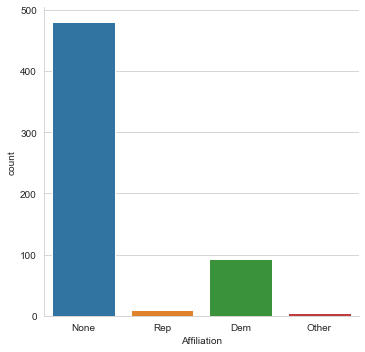

In [7]:
se.catplot(x='Affiliation',data=poll,kind='count')

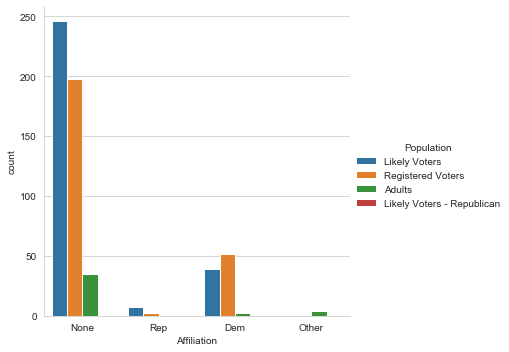

In [8]:
se.catplot(x='Affiliation',hue='Population',data=poll,kind='count')
#to check the genuineness of our data set. Most were neutral polls i.e not affiliated to any party

In [9]:
avg=pd.DataFrame(poll.mean(),columns=['Average'])
avg.drop('Number of Observations',axis=0,inplace=True)
avg.drop('Question Text',axis=0,inplace=True)
avg.drop('Question Iteration',axis=0,inplace=True)
avg

,Average
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [10]:
std=pd.DataFrame(poll.std())
std.drop('Number of Observations',axis=0,inplace=True)
std.drop('Question Text',axis=0,inplace=True)
std.drop('Question Iteration',axis=0,inplace=True)
std.columns=['Standard deviation']
std

,Standard deviation
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


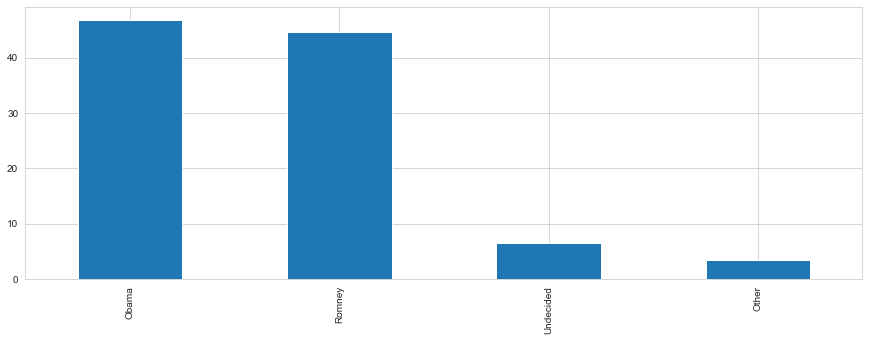

In [11]:
avg.plot(kind='bar',figsize=(15,5),legend=False,yerr=std)

In [12]:
poll_avg=pd.concat([avg,std],axis=1)
poll_avg

,Average,Standard deviation
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


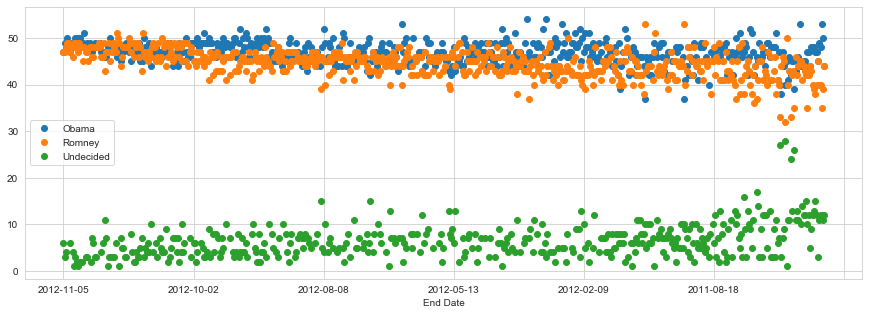

In [13]:
poll.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o',figsize=(15,5))

In [14]:
from datetime import datetime

In [15]:
poll['Difference']=(poll['Obama']-poll['Romney'])/100
poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [16]:
poll=poll.groupby(['Start Date'],as_index=False).mean()
poll.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


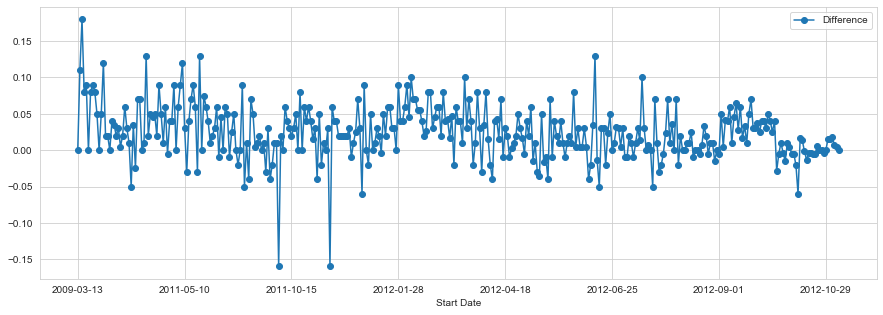

In [17]:
poll.plot(x='Start Date',y='Difference',figsize=(15,5),marker='o')

In [18]:
row_in=0
xlimit=[]

for date in poll['Start Date']:
    if(date[0:7]=='2012-10'):
        xlimit.append(row_in)
    row_in=row_in+1
print(min(xlimit))  
print(max(xlimit))

325
352


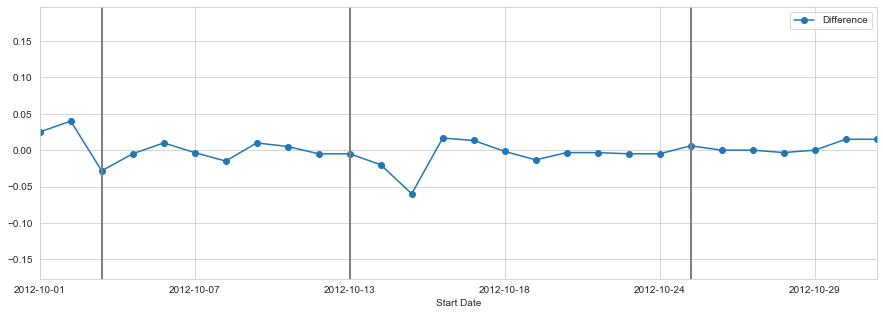

In [19]:
poll.plot(x='Start Date',y='Difference',figsize=(15,5),marker='o',xlim=(325,352))

#Oct 3rd
p.axvline(x=325+2,linewidth=2,color='grey')
#Oct 11th
p.axvline(x=325+10,linewidth=2,color='grey')
#Oct 22nd
p.axvline(x=325+21,linewidth=2,color='grey')

In [20]:
donor=pd.read_csv('Election_Donor_Data.csv')

c:\users\mitts\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
donor.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [22]:
donor.describe()

,contb_receipt_amt,file_num
count,1.001731e+06,1.001731e+06
mean,2.982352e+02,7.744948e+05
std,3.749667e+03,1.059822e+04
min,-3.080000e+04,7.235110e+05
25%,3.500000e+01,7.719270e+05
50%,1.000000e+02,7.792250e+05
75%,2.500000e+02,7.802340e+05
max,2.014491e+06,7.878030e+05


In [23]:
donor.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [24]:
donor['contb_receipt_amt'].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [25]:
don_mean=donor['contb_receipt_amt'].mean()
don_std=donor['contb_receipt_amt'].std()
print('The average donation was',round(don_mean,2),'with a std of',round(don_std,2))

The average donation was 298.24 with a std of 3749.67


In [26]:
top_donor=np.array(donor['contb_receipt_amt'])
top_donor.sort()
top_donor=pd.Series(top_donor)
top_donor=top_donor[top_donor>0]
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
dtype: int64

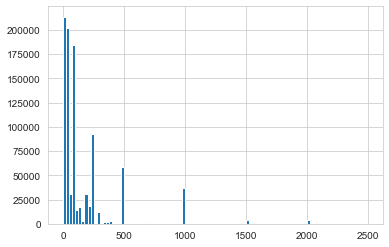

In [27]:
common_don=top_donor[top_donor<2500]
common_don.hist(bins=100)
#It proves that our people donate in round figure more as there are peaks at rounded numbers

In [36]:
candidates=(donor['cand_nm'].unique())
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [37]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [38]:
donor['Party']=donor['cand_nm'].map(party_map)
donor.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [39]:
donor=donor[donor['contb_receipt_amt']>0]

In [44]:
donor.groupby('cand_nm')['contb_receipt_amt'].count()
#number of donations to a single candidate

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [47]:
round(donor.groupby('cand_nm')['contb_receipt_amt'].sum(),0)
#sum of total donations to the candidates

cand_nm
Bachmann, Michelle                  2711439.0
Cain, Herman                        7101082.0
Gingrich, Newt                     12832770.0
Huntsman, Jon                       3330373.0
Johnson, Gary Earl                   566962.0
McCotter, Thaddeus G                  39030.0
Obama, Barack                     135877427.0
Paul, Ron                          21009620.0
Pawlenty, Timothy                   6004819.0
Perry, Rick                        20305754.0
Roemer, Charles E. 'Buddy' III       373010.0
Romney, Mitt                       88335908.0
Santorum, Rick                     11043159.0
Name: contb_receipt_amt, dtype: float64

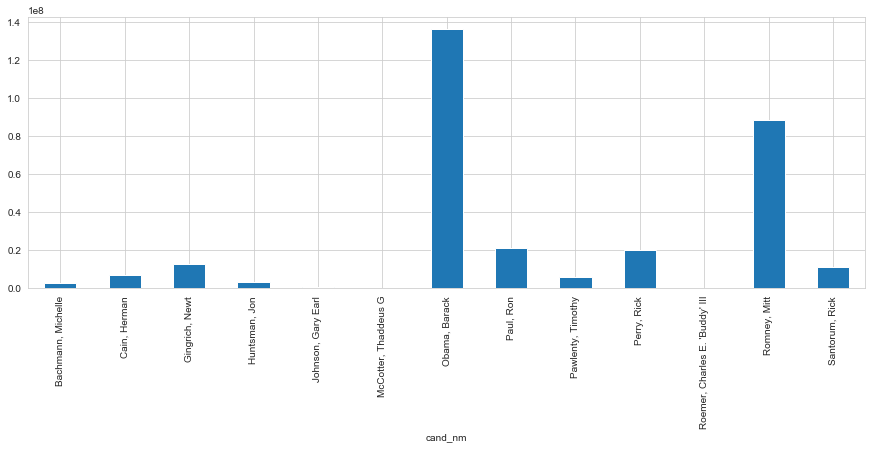

In [51]:
(donor.groupby('cand_nm')['contb_receipt_amt'].sum()).plot(kind='bar',figsize=(15,5))

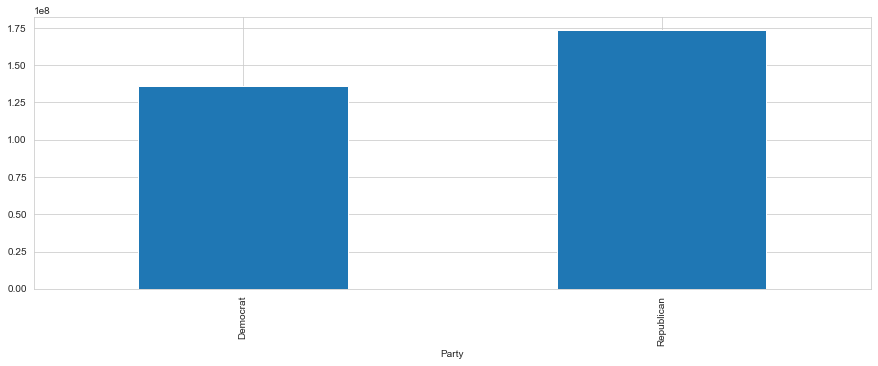

In [54]:
donor.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar',figsize=(15,5),legend=False)

In [58]:
occupation_contri=donor.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='Party',aggfunc='sum')
occupation_contri.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [75]:
occupation_contri=occupation_contri[occupation_contri.sum(axis=1)>1000000]
occupation_contri

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06


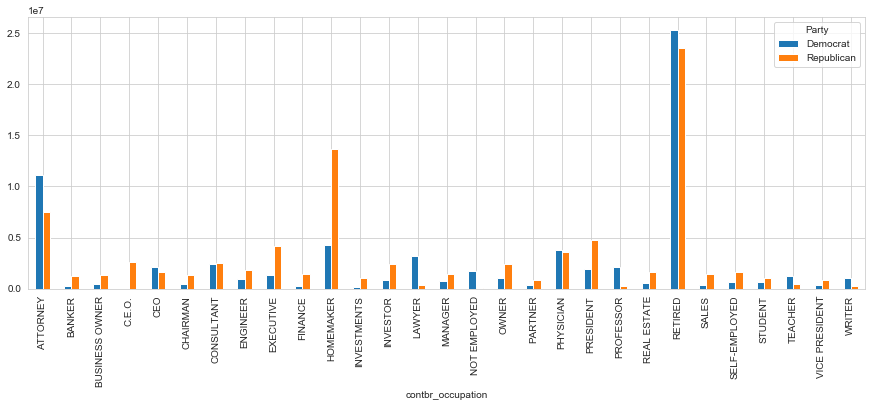

In [84]:
occupation_contri.plot(kind='bar',figsize=(15,5))

In [86]:
occupation_contri.loc['CEO']=occupation_contri.loc['CEO']+occupation_contri.loc['C.E.O.']
occupation_contri.drop(index='C.E.O.',inplace=True)

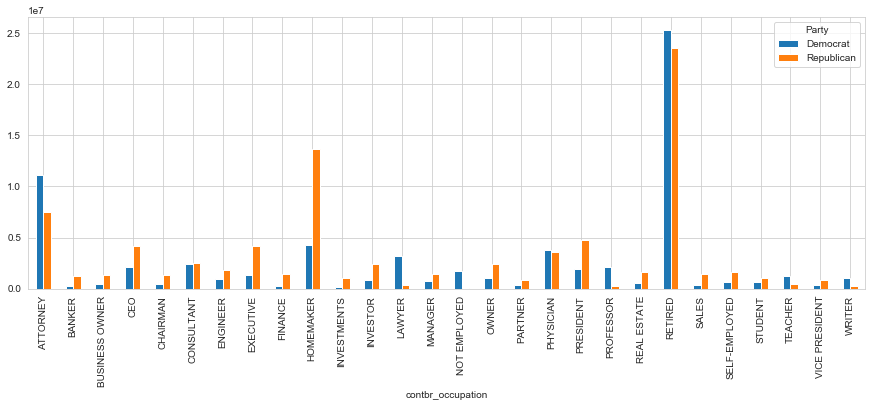

In [87]:
occupation_contri.plot(kind='bar',figsize=(15,5))